In [2]:
import pandas as pd
import math 
import numpy as np
import re
import json


In [3]:
df = pd.read_json('aptamers.json')

In [4]:
df.head()

,name,target,category,kd,bindingCondition,temp,length,molecular weight,extinction coefficient,gc content,nmoles/OD260,μg/OD260,reference,sequence
0,HMBA (aptabeacon),6X His-tag,Protein,~4.2 nM (reported value),"1X DPBS without Ca and Mg (pH 7.1-7.5), 20 °C",N/A°C,1,12990.45 g/mole,382400 L/(mole·cm),57.14%,2.62,33.97,X Tan,"[5', {5'/5-FAM}, dCp, dAp, dGp, dGp, dTp, dTp,..."
1,IgE (4.4.12),IgE,Protein,23 nM (reported value),Binding buffer: PBS and 1 mM MgCl,(pH 8.0),78,24050.67 g/mole,753800 L/(mole·cm),47.44%,1.33,31.91,"Mendonsa, Shaun D. and Bowser, Michael T. ""","[5', dAp, dGp, dCp, dAp, dGp, dCp, dAp, dCp, d..."
2,Tumour Marker MUC1 (S1.6),Tumour Marker MUC,Peptide,0.2131 nM (reported value),Binding Buffer (0.2 M NaHCO3 and 0.5 M NaCl (...,N/A°C,72,22336.6 g/mole,737600 L/(mole·cm),48.61%,1.36,30.28,"Ferreira, C., et al. ""DNA Aptamers That Bi nd ...","[5', dGp, dGp, dGp, dAp, dGp, dAp, dCp, dAp, d..."
3,Acute myeloid leukemia cells (KH1C12),Acute myeloid leukemia cells (HL60),Cells,4.5 nM (reported value),"Binding Buffer (4.5 g/L glucose, 5 mM MgCl",", 0.1 mg/ml tRNA and 1mg/ml BSA, dissolved in ...",68,20896.62 g/mole,647700 L/(mole·cm),47.06%,1.54,32.26,"Sefah, Kwame, et al. ""Molecular recognition of...","[5', dAp, dTp, dCp, dCp, dAp, dGp, dAp, dGp, d..."
4,Human Hepatocellular carcinoma (TLS11a),Human Hepatocellular carcinoma cell line (LH86),Cells,7.16 nM (reported value),Binding buffer (PBS containing 5 mM MgCl,", 4.5 mg/mL glucose, 0.1 mg/mL yeast tRNA, 1 m...",63,19339.58 g/mole,589200 L/(mole·cm),50.79%,1.70,32.82,"Meng, L. (2012). Targeted delivery of chemothe...","[5', dAp, dCp, dAp, dGp, dCp, dAp, dTp, dCp, d..."


df

In [5]:
df.length

0        1
1       78
2       72
3       68
4       63
      ... 
432     30
433     30
434    dTp
435     27
436    dCp
Name: length, Length: 437, dtype: object

In [6]:
df

,name,target,category,kd,bindingCondition,temp,length,molecular weight,extinction coefficient,gc content,nmoles/OD260,μg/OD260,reference,sequence
0,HMBA (aptabeacon),6X His-tag,Protein,~4.2 nM (reported value),"1X DPBS without Ca and Mg (pH 7.1-7.5), 20 °C",N/A°C,1,12990.45 g/mole,382400 L/(mole·cm),57.14%,2.62,33.97,X Tan,"[5', {5'/5-FAM}, dCp, dAp, dGp, dGp, dTp, dTp,..."
1,IgE (4.4.12),IgE,Protein,23 nM (reported value),Binding buffer: PBS and 1 mM MgCl,(pH 8.0),78,24050.67 g/mole,753800 L/(mole·cm),47.44%,1.33,31.91,"Mendonsa, Shaun D. and Bowser, Michael T. ""","[5', dAp, dGp, dCp, dAp, dGp, dCp, dAp, dCp, d..."
2,Tumour Marker MUC1 (S1.6),Tumour Marker MUC,Peptide,0.2131 nM (reported value),Binding Buffer (0.2 M NaHCO3 and 0.5 M NaCl (...,N/A°C,72,22336.6 g/mole,737600 L/(mole·cm),48.61%,1.36,30.28,"Ferreira, C., et al. ""DNA Aptamers That Bi nd ...","[5', dGp, dGp, dGp, dAp, dGp, dAp, dCp, dAp, d..."
3,Acute myeloid leukemia cells (KH1C12),Acute myeloid leukemia cells (HL60),Cells,4.5 nM (reported value),"Binding Buffer (4.5 g/L glucose, 5 mM MgCl",", 0.1 mg/ml tRNA and 1mg/ml BSA, dissolved in ...",68,20896.62 g/mole,647700 L/(mole·cm),47.06%,1.54,32.26,"Sefah, Kwame, et al. ""Molecular recognition of...","[5', dAp, dTp, dCp, dCp, dAp, dGp, dAp, dGp, d..."
4,Human Hepatocellular carcinoma (TLS11a),Human Hepatocellular carcinoma cell line (LH86),Cells,7.16 nM (reported value),Binding buffer (PBS containing 5 mM MgCl,", 4.5 mg/mL glucose, 0.1 mg/mL yeast tRNA, 1 m...",63,19339.58 g/mole,589200 L/(mole·cm),50.79%,1.70,32.82,"Meng, L. (2012). Targeted delivery of chemothe...","[5', dAp, dCp, dAp, dGp, dCp, dAp, dTp, dCp, d..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,PFOA Aptamer,"Polyfluoroalkyl acid (Perfluorooctanoic acid, ...",Small Organic,5.5 nM (reported value),"pH 7.5 buffer (20 mM HEPES, 1 M NaCl, 10 mM Mg...",23°C,30,9488.22 g/mole,308100 L/(mole·cm),60.00%,3.25,30.80,"Park, J., Yang, K.-A., Choi, Y., & Choe, J. K....","[5', dGp, dGp, dAp, dAp, dTp, dCp, dGp, dTp, d..."
433,HD1-15dA,Thrombin,Protein,50.9 nM (reported value),In the presence of different concentrations of...,25°C,30,9424.2 g/mole,325000 L/(mole·cm),30.00%,3.08,29.00,"Müller, J., Wulffen, B., Pötzsch, B., & Mayer,...","[5', dGp, dGp, dTp, dTp, dGp, dGp, dTp, dGp, d..."
434,AMP18,Ampcillin,Small Organic,9.8 nM (reported value),The ssDNA library (500 pmol) was pre-incubated...,4°C,dTp,dTp,dGp,dGp,3',19,"Song KM, Jeong E, Jeon W, Cho M, Ban C. Aptase...","[5', dTp, dTp, dAp, dGp, dTp, dTp, dGp, dGp, d..."
435,Aptamer Beacon,adenosine,Protein,6.0 nM (reported value),"150 mmol L−1 NaCl, 1 mmol L−1 MgCl2, 5 mmol L−...",37 °C,27,8459.31 g/mole,279432 L/(mole·cm),59.26%,3.58,30.27,"Zhang JQ, Wang YS, Xue JH, He Y, Yang HX, Lian...","[5', dAp, dCp, dCp, dTp, dGp, dGp, dGp, dGp, d..."


In [7]:
df = df[df['sequence'].str.len() != 0].reset_index(drop=True)




In [8]:
df

,name,target,category,kd,bindingCondition,temp,length,molecular weight,extinction coefficient,gc content,nmoles/OD260,μg/OD260,reference,sequence
0,HMBA (aptabeacon),6X His-tag,Protein,~4.2 nM (reported value),"1X DPBS without Ca and Mg (pH 7.1-7.5), 20 °C",N/A°C,1,12990.45 g/mole,382400 L/(mole·cm),57.14%,2.62,33.97,X Tan,"[5', {5'/5-FAM}, dCp, dAp, dGp, dGp, dTp, dTp,..."
1,IgE (4.4.12),IgE,Protein,23 nM (reported value),Binding buffer: PBS and 1 mM MgCl,(pH 8.0),78,24050.67 g/mole,753800 L/(mole·cm),47.44%,1.33,31.91,"Mendonsa, Shaun D. and Bowser, Michael T. ""","[5', dAp, dGp, dCp, dAp, dGp, dCp, dAp, dCp, d..."
2,Tumour Marker MUC1 (S1.6),Tumour Marker MUC,Peptide,0.2131 nM (reported value),Binding Buffer (0.2 M NaHCO3 and 0.5 M NaCl (...,N/A°C,72,22336.6 g/mole,737600 L/(mole·cm),48.61%,1.36,30.28,"Ferreira, C., et al. ""DNA Aptamers That Bi nd ...","[5', dGp, dGp, dGp, dAp, dGp, dAp, dCp, dAp, d..."
3,Acute myeloid leukemia cells (KH1C12),Acute myeloid leukemia cells (HL60),Cells,4.5 nM (reported value),"Binding Buffer (4.5 g/L glucose, 5 mM MgCl",", 0.1 mg/ml tRNA and 1mg/ml BSA, dissolved in ...",68,20896.62 g/mole,647700 L/(mole·cm),47.06%,1.54,32.26,"Sefah, Kwame, et al. ""Molecular recognition of...","[5', dAp, dTp, dCp, dCp, dAp, dGp, dAp, dGp, d..."
4,Human Hepatocellular carcinoma (TLS11a),Human Hepatocellular carcinoma cell line (LH86),Cells,7.16 nM (reported value),Binding buffer (PBS containing 5 mM MgCl,", 4.5 mg/mL glucose, 0.1 mg/mL yeast tRNA, 1 m...",63,19339.58 g/mole,589200 L/(mole·cm),50.79%,1.70,32.82,"Meng, L. (2012). Targeted delivery of chemothe...","[5', dAp, dCp, dAp, dGp, dCp, dAp, dTp, dCp, d..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,PFOA Aptamer,"Polyfluoroalkyl acid (Perfluorooctanoic acid, ...",Small Organic,5.5 nM (reported value),"pH 7.5 buffer (20 mM HEPES, 1 M NaCl, 10 mM Mg...",23°C,30,9488.22 g/mole,308100 L/(mole·cm),60.00%,3.25,30.80,"Park, J., Yang, K.-A., Choi, Y., & Choe, J. K....","[5', dGp, dGp, dAp, dAp, dTp, dCp, dGp, dTp, d..."
383,HD1-15dA,Thrombin,Protein,50.9 nM (reported value),In the presence of different concentrations of...,25°C,30,9424.2 g/mole,325000 L/(mole·cm),30.00%,3.08,29.00,"Müller, J., Wulffen, B., Pötzsch, B., & Mayer,...","[5', dGp, dGp, dTp, dTp, dGp, dGp, dTp, dGp, d..."
384,AMP18,Ampcillin,Small Organic,9.8 nM (reported value),The ssDNA library (500 pmol) was pre-incubated...,4°C,dTp,dTp,dGp,dGp,3',19,"Song KM, Jeong E, Jeon W, Cho M, Ban C. Aptase...","[5', dTp, dTp, dAp, dGp, dTp, dTp, dGp, dGp, d..."
385,Aptamer Beacon,adenosine,Protein,6.0 nM (reported value),"150 mmol L−1 NaCl, 1 mmol L−1 MgCl2, 5 mmol L−...",37 °C,27,8459.31 g/mole,279432 L/(mole·cm),59.26%,3.58,30.27,"Zhang JQ, Wang YS, Xue JH, He Y, Yang HX, Lian...","[5', dAp, dCp, dCp, dTp, dGp, dGp, dGp, dGp, d..."


One-Hot Encoding Features

In [9]:
NAME = df['name']
TARGET = df['target']
CATEGORY = df['category']


def extract_numeric_value(s):
    match = re.search(r'\d+[\d\.]*(?:\s*(?:/|\(|\)|·)\s*\d+[\d\.]*)*', str(s))
    if match:
        return match.group()
    else:
        return np.nan

#Get Kd
numeric_values = df['kd'].apply(extract_numeric_value).astype(float)
KD = pd.Series(numeric_values)

#Get molecular weight 
mol_weights = df['molecular weight'].apply(extract_numeric_value).astype(float)
MW = pd.Series(mol_weights)

#Get extinction Coefficient 
extinct = df['extinction coefficient'].apply(extract_numeric_value).astype(float)
EC = pd.Series(extinct)

#Get GC content 
gc = df['gc content'].apply(extract_numeric_value).astype(float)
GC = pd.Series(gc)

# #Get sequence  using list comprehensions
# sequence = df['sequence']
# bases = ['A', 'T', 'C', 'G']
# new_sequences = [[nuc[1] for nuc in seq if len(nuc) == 3 and nuc[1] in bases] for seq in sequence]

#Get sequence using regular expression 
# Define the regular expression pattern
pattern = re.compile(r'(?<=d)[ATCG](?=p)')
sequences = df['sequence'].apply(''.join)  #capture sequences 

# Apply the pattern to each string in sequences
new_sequences = ["".join(pattern.findall(seq)) for seq in sequences]

SEQUENCE = pd.Series(new_sequences)
SEQUENCE = SEQUENCE.apply(lambda x: ''.join(x))

REFERENCE = df['reference']


# #Construct dataframe with cleaned data 
aptamers = pd.DataFrame({'name': NAME, 'target': TARGET, 'category': CATEGORY, 'kd': KD, 'molecularWeight': MW, 'extinctCoe': EC, 'gcContent': GC, 'sequence': SEQUENCE, 'reference': REFERENCE})

#Drop any rows with empty kd 
aptamers = aptamers[aptamers['kd'].notnull()].reset_index(drop=True)
#aptamers = aptamers[aptamers['molecularWeight'].notnull()].reset_index(drop=True)
aptamers

,name,target,category,kd,molecularWeight,extinctCoe,gcContent,sequence,reference
0,HMBA (aptabeacon),6X His-tag,Protein,4.2000,12990.45,382400.0,57.14,CAGGTTGGTCTGGTTGGGTTTGGCTCCTGTGTACGCAACCTG,X Tan
1,IgE (4.4.12),IgE,Protein,23.0000,24050.67,753800.0,47.44,AGCAGCACAGAGGTCAGATGTGAAACATAGCATATTTACTTATGTC...,"Mendonsa, Shaun D. and Bowser, Michael T. """
2,Tumour Marker MUC1 (S1.6),Tumour Marker MUC,Peptide,0.2131,22336.60,737600.0,48.61,GGGAGACAAGAATAAACGCTCAAGCAACAGGGTATCCAAAGGATCA...,"Ferreira, C., et al. ""DNA Aptamers That Bi nd ..."
3,Acute myeloid leukemia cells (KH1C12),Acute myeloid leukemia cells (HL60),Cells,4.5000,20896.62,647700.0,47.06,ATCCAGAGTGACGCAGCATGCCCTAGTTACTACTACTCTTTTTAGC...,"Sefah, Kwame, et al. ""Molecular recognition of..."
4,Human Hepatocellular carcinoma (TLS11a),Human Hepatocellular carcinoma cell line (LH86),Cells,7.1600,19339.58,589200.0,50.79,ACAGCATCCCCATGTGAACAATCGCATTGTGATTGTTACGGTTTCC...,"Meng, L. (2012). Targeted delivery of chemothe..."
...,...,...,...,...,...,...,...,...,...
339,PFOA Aptamer,"Polyfluoroalkyl acid (Perfluorooctanoic acid, ...",Small Organic,5.5000,9488.22,308100.0,60.00,GGAATCGTGGGTGGTAGGGTAGGGGATGCA,"Park, J., Yang, K.-A., Choi, Y., & Choe, J. K...."
340,HD1-15dA,Thrombin,Protein,50.9000,9424.20,325000.0,30.00,GGTTGGTGTGGTTGGAAAAAAAAAAAAAAA,"Müller, J., Wulffen, B., Pötzsch, B., & Mayer,..."
341,AMP18,Ampcillin,Small Organic,9.8000,NaN,NaN,NaN,TTAGTTGGGGTTCAGTTGG,"Song KM, Jeong E, Jeon W, Cho M, Ban C. Aptase..."
342,Aptamer Beacon,adenosine,Protein,6.0000,8459.31,279432.0,59.26,ACCTGGGGGAGTATTGCGGAGGAAGGT,"Zhang JQ, Wang YS, Xue JH, He Y, Yang HX, Lian..."


In [10]:
#Get secondary structure and mfe for all sequences 
import nupack

#Store structure and mfe information
struct = []
gibbs = []
# Define the sequence
for sequence in aptamers['sequence']:
    
    # Define the strand and set the nucleic acid type (use 'dna' for DNA, 'rna' for RNA)
    strand = nupack.Strand(sequence, 'my_strand', material='DNA')

    # Create a complex with the strand
    complex = nupack.Complex([strand])

    # Set the calculation options, such as temperature and model
    options = nupack.Model(material='DNA', celsius=25)

    # Compute the MFE structure
    mfe_result = nupack.mfe(complex, model=options)

    # Print the MFE structure and its energy
    structure = str(mfe_result[0].structure)
    energy = str(mfe_result[0].energy)
    struct.append(structure)
    gibbs.append(energy)

    
    
    # print(f'Sequence: {sequence}')
    # print(f'MFE Structure: {structure}')
    # print(f'MFE Energy: {energy} kcal/mol')
def extract_features(row):
    structure = row['structure']
    
    features = {}
    
    # Hairpin loops, internal loops, and bulges
    features["hairpin_loops"] = structure.count("(")
    features["internal_loops"] = structure.count(".")
    features["bulges"] = structure.count(")")

    # Length of the longest stem
    longest_stem = 0
    current_stem = 0
    for char in structure:
        if char == "(":
            current_stem += 1
        else:
            longest_stem = max(longest_stem, current_stem)
            current_stem = 0
    features["longest_stem"] = longest_stem
    
    return features

#Add strucure and mfe information into dataframe
aptamers['structure'] = struct
aptamers['mfe'] = gibbs
aptamers[['hairpin_loops', 'internal_loops', 'bulges', 'longest_stem']] = aptamers.apply(extract_features, axis=1, result_type='expand')


Cluster 0: ['AGCAGCACAGAGGTCAGATGTGAAACATAGCATATTTACTTATGTCGCCTTGCCGGTTCCTATGCGTGCTACCGTGAA', 'GGGAGACAAGAATAAACGCTCAAGCAACAGGGTATCCAAAGGATCAAATTCGACAGGAGGCTCACAACAGGC', 'ATCCAGAGTGACGCAGCATGCCCTAGTTACTACTACTCTTTTTAGCAAACTGGACACGGTGGCTTAGT', 'GCCAGGGGTTCCACTACGTAGAACACGACGGGAATACTGACTCTCCCCCATGTACCAGGGGGCAGAGAGAAGGGC', 'CGTACGGAATTCGCTAGCCCCCCGGCAGGCCACGGCTTGGGTTGGTCCCACTGCGCGTGGATCCGAGCTCCACGTG', 'GGCTGTTGTGAGCCTCCTCCCAGAGGGAAGACTTTAGGTTCGGTTCACGTCCCGCTTATTCTTACTCCC', 'TACCAGTGCGATGCTCAGGCCGATGTCAACTTTTTCTAACTCACTGGTTTTGCCTGACGCATTCGGTTGAC', 'AGCAGCACAGAGGTCAGATGCACTCGGACCCCATTCTCCTTCCATCCCTCATCCGTCCACCCTATGCGTGCTACCGTGAA', 'AGCAGCACAGAGGTCAGATGCACTCGGACCCCATTCTCCTTCCATCCCTCATCCGTCCACCCTATGCGTGCTACCGTGAA', 'CTTCTGCCCGCCTCCTTCCGACCTAGCAGTGGACATGTGGCAGGGTGAAGTGGCATCGTCGGAGACGAGATAGGCGGACACT', 'ATCGTCTGCTCCGTCCAATATGATGACACCTGCATAATTTATAGTGAGTCTTGATTCACGCTGCATTTGGTGTGAGGTCGTGC', 'GGCAGGAAGACAAACACGATGGGGGGGTATGATTTGATGTGGTTGTTGCATGATCGTGGTCTGTGGTGCTGT', 'AGCAGCACAGAGGTCAGATGACTTCAGTGAGTT

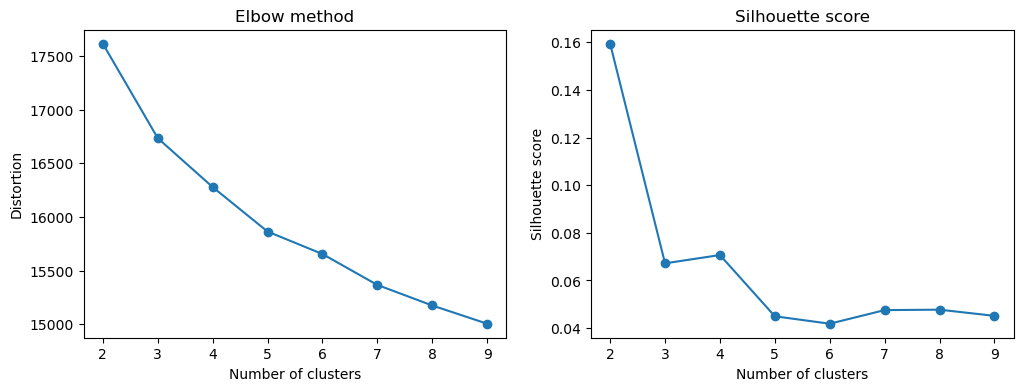

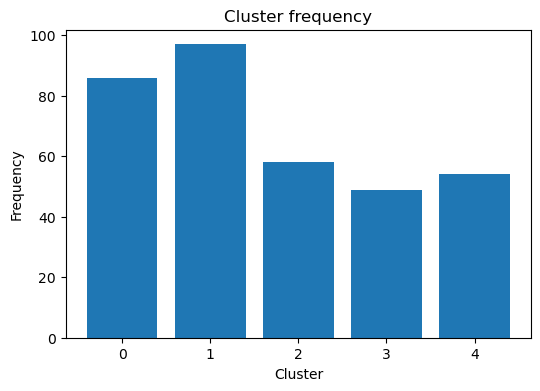

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import os
# Define your sequences as a list of strings
sequences = aptamers['sequence'].to_list()

# Define a function to one-hot encode your sequences
def one_hot_encode(sequences):
    encoder = OneHotEncoder(categories=[['A', 'C', 'G', 'T', 'X']], sparse_output=False)
    encoded_seqs = []
    max_len = max(len(seq) for seq in sequences)
    padded_sequences = [seq.ljust(max_len, 'X') for seq in sequences]

    for seq in padded_sequences:
        encoded_seq = encoder.fit_transform(np.array(list(seq)).reshape(-1, 1))
        encoded_seqs.append(encoded_seq.flatten())

    return np.array(encoded_seqs)

# One-hot encode your sequences
encoded_sequences = one_hot_encode(sequences)

# Determine optimal number of clusters using elbow method and silhouette score
distortions = []
silhouette_scores = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0).fit(encoded_sequences)
    distortions.append(kmeans.inertia_)
    score = silhouette_score(encoded_sequences, kmeans.labels_)
    silhouette_scores.append(score)

# Plot elbow curve and silhouette score
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(range(2, 10), distortions, marker='o')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Distortion')
ax[0].set_title('Elbow method')
ax[1].plot(range(2, 10), silhouette_scores, marker='o')
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('Silhouette score')
ax[1].set_title('Silhouette score')

# Perform k-means clustering with Euclidean distance
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0).fit(encoded_sequences)

# Assign the sequences to clusters
clusters = {i: [] for i in range(n_clusters)}
for seq, cluster in zip(sequences, kmeans.labels_):
    clusters[cluster].append(seq)

# Print clusters
for i in range(n_clusters):
    print(f'Cluster {i}: {clusters[i]}')

# Plot frequency of clusters
cluster_sizes = [len(clusters[i]) for i in range(n_clusters)]
plt.figure(figsize=(6, 4))
plt.bar(range(n_clusters), cluster_sizes)
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Cluster frequency')
plt.show()

# Define the output directory
output_dir = './cluster_sequences'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

# Write clusters to FASTA files
for i in range(n_clusters):
    cluster_seqs = clusters[i]
    cluster_name = f'cluster_{i+1}'
    with open(f'{cluster_name}.fasta', 'w') as f:
        for j, seq in enumerate(cluster_seqs):
            f.write(f'>{cluster_name}_{j+1}\n{seq}\n')


In [12]:
from Bio import motifs
from Bio.Seq import Seq
from Bio.motifs import matrix
import numpy as np

# Define the list of MEME output files
meme_files = ['meme_1.xml', 'meme_2.xml', 'meme_3.xml', 'meme_4.xml', 'meme_5.xml']

# Initialize a list to store the PSSMs
pssms = []

# Loop over the MEME output files
for meme_file in meme_files:
    # Parse the MEME XML file and get the best motif based on e-value
    with open(meme_file) as handle:
        record = motifs.parse(handle, "meme")
    
    best_motif = record[0] #This selects the motif with the lowest e-value by default
    
    # Get the counts matrix and normalize to obtain the frequency matrix
    counts_matrix = best_motif.counts
    frequency_matrix = counts_matrix.normalize(pseudocounts=0.1)
    
    # Create the PWM from the frequency matrix
    pwm = matrix.PositionWeightMatrix(best_motif.alphabet, frequency_matrix)
    
    # Create the PSSM from the PWM
    pssm = pwm.log_odds()
    
    # Add the PSSM to the list
    pssms.append(pssm)

# Initialize a list to store the feature vectors for each sequence
feature_vectors = []
threshold = 3.0
# Iterate over each sequence
for sequence in aptamers['sequence']:
    test_seq = Seq(sequence)
    seq_scores = []
    # Iterate over each PSSM and find the highest score for the current sequence
    for pssm in pssms:
        max_score = 0
        pssm_len = pssm.length
        for i in range(len(test_seq) - pssm_len + 1):
            sub_seq = test_seq[i:i+pssm_len]
            score = pssm.calculate(sub_seq)
            if score >= threshold:
                if score > max_score:
                    max_score = score
        seq_scores.append(max_score)
    feature_vectors.append(seq_scores)

# # Convert the feature vectors list to a numpy array
# feature_vectors = np.array(feature_vectors)
aptamers['motif'] = feature_vectors

FileNotFoundError: [Errno 2] No such file or directory: 'meme_1.xml'

In [ ]:
aptamers

,name,target,category,kd,molecularWeight,extinctCoe,gcContent,sequence,reference,structure,mfe,hairpin_loops,internal_loops,bulges,longest_stem,motif
0,HMBA (aptabeacon),6X His-tag,Protein,4.2000,12990.45,382400.0,57.14,CAGGTTGGTCTGGTTGGGTTTGGCTCCTGTGTACGCAACCTG,X Tan,...........(((((.((.............)).)))))..,-7.817323684692383,7,28,7,5,"[16.80153, 0, 16.272717, 0, 0]"
1,IgE (4.4.12),IgE,Protein,23.0000,24050.67,753800.0,47.44,AGCAGCACAGAGGTCAGATGTGAAACATAGCATATTTACTTATGTC...,"Mendonsa, Shaun D. and Bowser, Michael T. """,(((((((...((((((....))).(((((...........)))))(...,-11.482182502746582,20,38,20,7,"[0, 37.729427, 0, 0, 0]"
2,Tumour Marker MUC1 (S1.6),Tumour Marker MUC,Peptide,0.2131,22336.60,737600.0,48.61,GGGAGACAAGAATAAACGCTCAAGCAACAGGGTATCCAAAGGATCA...,"Ferreira, C., et al. ""DNA Aptamers That Bi nd ...",.(....)..........((....))........((((...)))).....,-7.220781326293945,12,48,12,4,"[0, 0, 0, 0, 0]"
3,Acute myeloid leukemia cells (KH1C12),Acute myeloid leukemia cells (HL60),Cells,4.5000,20896.62,647700.0,47.06,ATCCAGAGTGACGCAGCATGCCCTAGTTACTACTACTCTTTTTAGC...,"Sefah, Kwame, et al. ""Molecular recognition of...",..(((..(((..(((...)))((.((((.(((..........)))....,-10.793314933776855,18,32,18,4,"[0, 0, 0, 0, 0]"
4,Human Hepatocellular carcinoma (TLS11a),Human Hepatocellular carcinoma cell line (LH86),Cells,7.1600,19339.58,589200.0,50.79,ACAGCATCCCCATGTGAACAATCGCATTGTGATTGTTACGGTTTCC...,"Meng, L. (2012). Targeted delivery of chemothe...",.(((((...(((((.((((((((.......))))))).(((...))...,-18.937185287475586,21,21,21,8,"[0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,Aptamer MA,methylenedioxypyrovalerone (MDPV),Small Organic,7.0000,14134.82,441918.0,47.83,CTTACGACTCAGGCATTTTGCCGGGTAACGAAGTTACTGTCGTAAG,"Haixiang Yu, Weijuan Yang, Obtin Alkhamis, Jua...",((((((((.(.((((...)))).)(((((...))))).)))))))),-16.568788528442383,18,10,18,8,"[0, 0, 0, 0, 0]"
289,CSS.1,Cortisol,Small Organic,245.0000,12881.40,395100.0,54.76,GACGACGCCCGCATGTTCCATGGATAGTCTTGACTAGTCGTC,"Niu, C., Ding, Y., Zhang, C., & Liu, J. (2022)...",((((((.....((((...))))..((((....)))))))))),-10.213896751403809,14,14,14,6,"[0, 0, 0, 0, 0]"
290,PFOA Aptamer,"Polyfluoroalkyl acid (Perfluorooctanoic acid, ...",Small Organic,5.5000,9488.22,308100.0,60.00,GGAATCGTGGGTGGTAGGGTAGGGGATGCA,"Park, J., Yang, K.-A., Choi, Y., & Choe, J. K....",.(.(((..................))).).,-0.25940775871276855,4,22,4,3,"[16.27103, 0, 3.0145974, 0, 0]"
291,HD1-15dA,Thrombin,Protein,50.9000,9424.20,325000.0,30.00,GGTTGGTGTGGTTGGAAAAAAAAAAAAAAA,"Müller, J., Wulffen, B., Pötzsch, B., & Mayer,...",..............................,0.0,0,30,0,0,"[23.595945, 0, 0, 0, 0]"


In [ ]:
#Generate nucleotide frequencies

def nucleotide_frequencies(sequence):
    nucleotide_counts = {'A': 0, 'C': 0, 'G': 0, 'T': 0}
    for nucleotide in sequence:
        if nucleotide in nucleotide_counts:
            nucleotide_counts[nucleotide] += 1
    
    sequence_length = len(sequence)
    for nucleotide, count in nucleotide_counts.items():
        nucleotide_counts[nucleotide] = count / sequence_length
    
    return nucleotide_counts

aptamers['nucleotide_frequency'] = aptamers['sequence'].apply(nucleotide_frequencies)

aptamers

,name,target,category,kd,molecularWeight,extinctCoe,gcContent,sequence,reference,structure,mfe,hairpin_loops,internal_loops,bulges,longest_stem,motif,nucleotide_frequency
0,HMBA (aptabeacon),6X His-tag,Protein,4.2000,12990.45,382400.0,57.14,CAGGTTGGTCTGGTTGGGTTTGGCTCCTGTGTACGCAACCTG,X Tan,...........(((((.((.............)).)))))..,-7.817323684692383,7,28,7,5,"[16.80153, 0, 16.272717, 0, 0]","{'A': 0.09523809523809523, 'C': 0.214285714285..."
1,IgE (4.4.12),IgE,Protein,23.0000,24050.67,753800.0,47.44,AGCAGCACAGAGGTCAGATGTGAAACATAGCATATTTACTTATGTC...,"Mendonsa, Shaun D. and Bowser, Michael T. """,(((((((...((((((....))).(((((...........)))))(...,-11.482182502746582,20,38,20,7,"[0, 37.729427, 0, 0, 0]","{'A': 0.2564102564102564, 'C': 0.2307692307692..."
2,Tumour Marker MUC1 (S1.6),Tumour Marker MUC,Peptide,0.2131,22336.60,737600.0,48.61,GGGAGACAAGAATAAACGCTCAAGCAACAGGGTATCCAAAGGATCA...,"Ferreira, C., et al. ""DNA Aptamers That Bi nd ...",.(....)..........((....))........((((...)))).....,-7.220781326293945,12,48,12,4,"[0, 0, 0, 0, 0]","{'A': 0.4027777777777778, 'C': 0.2222222222222..."
3,Acute myeloid leukemia cells (KH1C12),Acute myeloid leukemia cells (HL60),Cells,4.5000,20896.62,647700.0,47.06,ATCCAGAGTGACGCAGCATGCCCTAGTTACTACTACTCTTTTTAGC...,"Sefah, Kwame, et al. ""Molecular recognition of...",..(((..(((..(((...)))((.((((.(((..........)))....,-10.793314933776855,18,32,18,4,"[0, 0, 0, 0, 0]","{'A': 0.25, 'C': 0.25, 'G': 0.2205882352941176..."
4,Human Hepatocellular carcinoma (TLS11a),Human Hepatocellular carcinoma cell line (LH86),Cells,7.1600,19339.58,589200.0,50.79,ACAGCATCCCCATGTGAACAATCGCATTGTGATTGTTACGGTTTCC...,"Meng, L. (2012). Targeted delivery of chemothe...",.(((((...(((((.((((((((.......))))))).(((...))...,-18.937185287475586,21,21,21,8,"[0, 0, 0, 0, 0]","{'A': 0.20634920634920634, 'C': 0.269841269841..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,Aptamer MA,methylenedioxypyrovalerone (MDPV),Small Organic,7.0000,14134.82,441918.0,47.83,CTTACGACTCAGGCATTTTGCCGGGTAACGAAGTTACTGTCGTAAG,"Haixiang Yu, Weijuan Yang, Obtin Alkhamis, Jua...",((((((((.(.((((...)))).)(((((...))))).)))))))),-16.568788528442383,18,10,18,8,"[0, 0, 0, 0, 0]","{'A': 0.2391304347826087, 'C': 0.2173913043478..."
289,CSS.1,Cortisol,Small Organic,245.0000,12881.40,395100.0,54.76,GACGACGCCCGCATGTTCCATGGATAGTCTTGACTAGTCGTC,"Niu, C., Ding, Y., Zhang, C., & Liu, J. (2022)...",((((((.....((((...))))..((((....)))))))))),-10.213896751403809,14,14,14,6,"[0, 0, 0, 0, 0]","{'A': 0.19047619047619047, 'C': 0.285714285714..."
290,PFOA Aptamer,"Polyfluoroalkyl acid (Perfluorooctanoic acid, ...",Small Organic,5.5000,9488.22,308100.0,60.00,GGAATCGTGGGTGGTAGGGTAGGGGATGCA,"Park, J., Yang, K.-A., Choi, Y., & Choe, J. K....",.(.(((..................))).).,-0.25940775871276855,4,22,4,3,"[16.27103, 0, 3.0145974, 0, 0]","{'A': 0.2, 'C': 0.06666666666666667, 'G': 0.53..."
291,HD1-15dA,Thrombin,Protein,50.9000,9424.20,325000.0,30.00,GGTTGGTGTGGTTGGAAAAAAAAAAAAAAA,"Müller, J., Wulffen, B., Pötzsch, B., & Mayer,...",..............................,0.0,0,30,0,0,"[23.595945, 0, 0, 0, 0]","{'A': 0.5, 'C': 0.0, 'G': 0.3, 'T': 0.2}"


In [ ]:
#Di and tri nucleutide frequencies aka kmers
def get_nucleotide_frequencies(sequence, k):
    n = len(sequence)
    counts = {}
    for i in range(n - k + 1):
        kmer = sequence[i:i+k]
        if kmer not in counts:
            counts[kmer] = 0
        counts[kmer] += 1
    total_kmers = sum(counts.values())
    frequencies = {kmer: count / total_kmers for kmer, count in counts.items()}
    return frequencies
aptamers['dinucleotide_freqs'] = aptamers['sequence'].apply(get_nucleotide_frequencies, k=2)
aptamers['trinucleotide_freqs'] = aptamers['sequence'].apply(get_nucleotide_frequencies, k=3)
aptamers


,name,target,category,kd,molecularWeight,extinctCoe,gcContent,sequence,reference,structure,mfe,hairpin_loops,internal_loops,bulges,longest_stem,motif,nucleotide_frequency,dinucleotide_freqs,trinucleotide_freqs
0,HMBA (aptabeacon),6X His-tag,Protein,4.2000,12990.45,382400.0,57.14,CAGGTTGGTCTGGTTGGGTTTGGCTCCTGTGTACGCAACCTG,X Tan,...........(((((.((.............)).)))))..,-7.817323684692383,7,28,7,5,"[16.80153, 0, 16.272717, 0, 0]","{'A': 0.09523809523809523, 'C': 0.214285714285...","{'CA': 0.04878048780487805, 'AG': 0.0243902439...","{'CAG': 0.025, 'AGG': 0.025, 'GGT': 0.1, 'GTT'..."
1,IgE (4.4.12),IgE,Protein,23.0000,24050.67,753800.0,47.44,AGCAGCACAGAGGTCAGATGTGAAACATAGCATATTTACTTATGTC...,"Mendonsa, Shaun D. and Bowser, Michael T. """,(((((((...((((((....))).(((((...........)))))(...,-11.482182502746582,20,38,20,7,"[0, 37.729427, 0, 0, 0]","{'A': 0.2564102564102564, 'C': 0.2307692307692...","{'AG': 0.07792207792207792, 'GC': 0.0909090909...","{'AGC': 0.039473684210526314, 'GCA': 0.0394736..."
2,Tumour Marker MUC1 (S1.6),Tumour Marker MUC,Peptide,0.2131,22336.60,737600.0,48.61,GGGAGACAAGAATAAACGCTCAAGCAACAGGGTATCCAAAGGATCA...,"Ferreira, C., et al. ""DNA Aptamers That Bi nd ...",.(....)..........((....))........((((...)))).....,-7.220781326293945,12,48,12,4,"[0, 0, 0, 0, 0]","{'A': 0.4027777777777778, 'C': 0.2222222222222...","{'GG': 0.11267605633802817, 'GA': 0.0845070422...","{'GGG': 0.02857142857142857, 'GGA': 0.04285714..."
3,Acute myeloid leukemia cells (KH1C12),Acute myeloid leukemia cells (HL60),Cells,4.5000,20896.62,647700.0,47.06,ATCCAGAGTGACGCAGCATGCCCTAGTTACTACTACTCTTTTTAGC...,"Sefah, Kwame, et al. ""Molecular recognition of...",..(((..(((..(((...)))((.((((.(((..........)))....,-10.793314933776855,18,32,18,4,"[0, 0, 0, 0, 0]","{'A': 0.25, 'C': 0.25, 'G': 0.2205882352941176...","{'AT': 0.029850746268656716, 'TC': 0.029850746...","{'ATC': 0.015151515151515152, 'TCC': 0.0151515..."
4,Human Hepatocellular carcinoma (TLS11a),Human Hepatocellular carcinoma cell line (LH86),Cells,7.1600,19339.58,589200.0,50.79,ACAGCATCCCCATGTGAACAATCGCATTGTGATTGTTACGGTTTCC...,"Meng, L. (2012). Targeted delivery of chemothe...",.(((((...(((((.((((((((.......))))))).(((...))...,-18.937185287475586,21,21,21,8,"[0, 0, 0, 0, 0]","{'A': 0.20634920634920634, 'C': 0.269841269841...","{'AC': 0.06451612903225806, 'CA': 0.0967741935...","{'ACA': 0.03278688524590164, 'CAG': 0.01639344..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,Aptamer MA,methylenedioxypyrovalerone (MDPV),Small Organic,7.0000,14134.82,441918.0,47.83,CTTACGACTCAGGCATTTTGCCGGGTAACGAAGTTACTGTCGTAAG,"Haixiang Yu, Weijuan Yang, Obtin Alkhamis, Jua...",((((((((.(.((((...)))).)(((((...))))).)))))))),-16.568788528442383,18,10,18,8,"[0, 0, 0, 0, 0]","{'A': 0.2391304347826087, 'C': 0.2173913043478...","{'CT': 0.06666666666666667, 'TT': 0.1111111111...","{'CTT': 0.022727272727272728, 'TTA': 0.0454545..."
289,CSS.1,Cortisol,Small Organic,245.0000,12881.40,395100.0,54.76,GACGACGCCCGCATGTTCCATGGATAGTCTTGACTAGTCGTC,"Niu, C., Ding, Y., Zhang, C., & Liu, J. (2022)...",((((((.....((((...))))..((((....)))))))))),-10.213896751403809,14,14,14,6,"[0, 0, 0, 0, 0]","{'A': 0.19047619047619047, 'C': 0.285714285714...","{'GA': 0.0975609756097561, 'AC': 0.07317073170...","{'GAC': 0.075, 'ACG': 0.05, 'CGA': 0.025, 'CGC..."
290,PFOA Aptamer,"Polyfluoroalkyl acid (Perfluorooctanoic acid, ...",Small Organic,5.5000,9488.22,308100.0,60.00,GGAATCGTGGGTGGTAGGGTAGGGGATGCA,"Park, J., Yang, K.-A., Choi, Y., & Choe, J. K....",.(.(((..................))).).,-0.25940775871276855,4,22,4,3,"[16.27103, 0, 3.0145974, 0, 0]","{'A': 0.2, 'C': 0.06666666666666667, 'G': 0.53...","{'GG': 0.3103448275862069, 'GA': 0.06896551724...","{'GGA': 0.07142857142857142, 'GAA': 0.03571428..."
291,HD1-15dA,Thrombin,Protein,50.9000,9424.20,325000.0,30.00,GGTTGGTGTGGTTGGAAAAAAAAAAAAAAA,"Müller, J., Wulffen, B., Pötzsch, B., & Mayer,...",..............................,0.0,0,30,0,0,"[23.595945, 0, 0, 0, 0]","

In [ ]:
import pandas as pd
from gensim.models import Word2Vec

# Tokenize sequences into k-mers
def tokenize_sequences(sequences, k=3):
    tokenized = []
    for seq in sequences:
        tokens = [seq[i:i+k] for i in range(len(seq) - k + 1)]
        tokenized.append(tokens)
    return tokenized

k = 3
tokenized_sequences = tokenize_sequences(aptamers['sequence'], k)

# Train Word2Vec model
word2vec_model = Word2Vec(tokenized_sequences, vector_size=100, window=5, min_count=1, workers=4)

# Convert sequences to embeddings
def sequence_to_embedding(sequence, model, k=3):
    tokens = [sequence[i:i+k] for i in range(len(sequence) - k + 1)]
    embeddings = [model.wv[token] for token in tokens if token in model.wv]
    return np.mean(embeddings, axis=0)

sequence_embeddings = [sequence_to_embedding(seq, word2vec_model, k) for seq in aptamers['sequence']]
aptamers['sequence_embedding'] = sequence_embeddings
aptamers


,name,target,category,kd,molecularWeight,extinctCoe,gcContent,sequence,reference,structure,mfe,hairpin_loops,internal_loops,bulges,longest_stem,motif,nucleotide_frequency,dinucleotide_freqs,trinucleotide_freqs,sequence_embedding
0,HMBA (aptabeacon),6X His-tag,Protein,4.2000,12990.45,382400.0,57.14,CAGGTTGGTCTGGTTGGGTTTGGCTCCTGTGTACGCAACCTG,X Tan,...........(((((.((.............)).)))))..,-7.817323684692383,7,28,7,5,"[16.80153, 0, 16.272717, 0, 0]","{'A': 0.09523809523809523, 'C': 0.214285714285...","{'CA': 0.04878048780487805, 'AG': 0.0243902439...","{'CAG': 0.025, 'AGG': 0.025, 'GGT': 0.1, 'GTT'...","[0.14027126, 0.03609632, -0.13037583, -0.00880..."
1,IgE (4.4.12),IgE,Protein,23.0000,24050.67,753800.0,47.44,AGCAGCACAGAGGTCAGATGTGAAACATAGCATATTTACTTATGTC...,"Mendonsa, Shaun D. and Bowser, Michael T. """,(((((((...((((((....))).(((((...........)))))(...,-11.482182502746582,20,38,20,7,"[0, 37.729427, 0, 0, 0]","{'A': 0.2564102564102564, 'C': 0.2307692307692...","{'AG': 0.07792207792207792, 'GC': 0.0909090909...","{'AGC': 0.039473684210526314, 'GCA': 0.0394736...","[0.154936, 0.02606689, -0.13961196, -0.0112173..."
2,Tumour Marker MUC1 (S1.6),Tumour Marker MUC,Peptide,0.2131,22336.60,737600.0,48.61,GGGAGACAAGAATAAACGCTCAAGCAACAGGGTATCCAAAGGATCA...,"Ferreira, C., et al. ""DNA Aptamers That Bi nd ...",.(....)..........((....))........((((...)))).....,-7.220781326293945,12,48,12,4,"[0, 0, 0, 0, 0]","{'A': 0.4027777777777778, 'C': 0.2222222222222...","{'GG': 0.11267605633802817, 'GA': 0.0845070422...","{'GGG': 0.02857142857142857, 'GGA': 0.04285714...","[0.16093335, 0.026758144, -0.14252622, -0.0134..."
3,Acute myeloid leukemia cells (KH1C12),Acute myeloid leukemia cells (HL60),Cells,4.5000,20896.62,647700.0,47.06,ATCCAGAGTGACGCAGCATGCCCTAGTTACTACTACTCTTTTTAGC...,"Sefah, Kwame, et al. ""Molecular recognition of...",..(((..(((..(((...)))((.((((.(((..........)))....,-10.793314933776855,18,32,18,4,"[0, 0, 0, 0, 0]","{'A': 0.25, 'C': 0.25, 'G': 0.2205882352941176...","{'AT': 0.029850746268656716, 'TC': 0.029850746...","{'ATC': 0.015151515151515152, 'TCC': 0.0151515...","[0.15551938, 0.027275175, -0.14083877, -0.0126..."
4,Human Hepatocellular carcinoma (TLS11a),Human Hepatocellular carcinoma cell line (LH86),Cells,7.1600,19339.58,589200.0,50.79,ACAGCATCCCCATGTGAACAATCGCATTGTGATTGTTACGGTTTCC...,"Meng, L. (2012). Targeted delivery of chemothe...",.(((((...(((((.((((((((.......))))))).(((...))...,-18.937185287475586,21,21,21,8,"[0, 0, 0, 0, 0]","{'A': 0.20634920634920634, 'C': 0.269841269841...","{'AC': 0.06451612903225806, 'CA': 0.0967741935...","{'ACA': 0.03278688524590164, 'CAG': 0.01639344...","[0.15207292, 0.029473107, -0.13897306, -0.0112..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,Aptamer MA,methylenedioxypyrovalerone (MDPV),Small Organic,7.0000,14134.82,441918.0,47.83,CTTACGACTCAGGCATTTTGCCGGGTAACGAAGTTACTGTCGTAAG,"Haixiang Yu, Weijuan Yang, Obtin Alkhamis, Jua...",((((((((.(.((((...)))).)(((((...))))).)))))))),-16.568788528442383,18,10,18,8,"[0, 0, 0, 0, 0]","{'A': 0.2391304347826087, 'C': 0.2173913043478...","{'CT': 0.06666666666666667, 'TT': 0.1111111111...","{'CTT': 0.022727272727272728, 'TTA': 0.0454545...","[0.15199555, 0.02981413, -0.13724975, -0.01187..."
289,CSS.1,Cortisol,Small Organic,245.0000,12881.40,395100.0,54.76,GACGACGCCCGCATGTTCCATGGATAGTCTTGACTAGTCGTC,"Niu, C., Ding, Y., Zhang, C., & Liu, J. (2022)...",((((((.....((((...))))..((((....)))))))))),-10.213896751403809,14,14,14,6,"[0, 0, 0, 0, 0]","{'A': 0.19047619047619047, 'C': 0.285714285714...","{'GA': 0.0975609756097561, 'AC': 0.07317073170...","{'GAC': 0.075, 'ACG': 0.05, 'CGA': 0.025, 'CGC...","[0.1552454, 0.025697827, -0.13780893, -0.01370..."
290,PFOA Aptamer,"Polyfluoroalkyl acid (Perfluorooctanoic acid, ...",Small Organic,5.5000,9488.22,308100.0,60.00,GGAATCGTGGGTGGTAGGGTAGGGGATGCA,"Park, J., Yang, K.-A., Choi, Y., & Choe, J. K....",.(.(((..................))).).,-0.25940775871276855,4,22,4,3,"[16.27103, 0, 3.

In [ ]:
#Collect target information from pubchem
from rdkit import Chem
from pubchempy import get_compounds

target_names = aptamers['target'].unique()  # Get unique target names from DataFrame

found_compounds = []  # Initialize an empty list to store found compounds
for name in target_names:
    try:
        compounds = get_compounds(name, 'name')  # Try to retrieve the compounds from PubChem
        for compound in compounds:
            mol = Chem.MolFromSmiles(compound.isomeric_smiles)  # Convert compound SMILES to RDKit Mol object
            found_compounds.append({'name': name, 'cid': compound.cid, 'smiles': compound.isomeric_smiles, 'mol': mol})  # If the compound was found, append its information to found_compounds list
    except:
        pass  # If the compound was not found or an error occurred, do nothing

# Create a DataFrame from the found_compounds list
found_compounds_df = pd.DataFrame(found_compounds)




NameError: name 'aptamers' is not defined

In [ ]:
print(found_compounds_df['name'])

0               IgE
1         Omethoate
2      Isocarbophos
3      Tetracycline
4        Profenofos
          ...      
63         Melamine
64    Metronidazole
65        Vitamin C
66      Lactoferrin
67        adenosine
Name: name, Length: 68, dtype: object


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from pubchempy import get_compounds

# Define function to retrieve PubChem compound and extract features
def get_target_features(target_name):
    # try:
    compound = get_compounds(target_name, 'name')[0]  # Try to retrieve the compound from PubChem
    mol = Chem.MolFromSmiles(compound.isomeric_smiles)  # Convert compound SMILES to RDKit Mol object
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)  # Calculate Morgan fingerprint        
    mw = compound.molecular_weight  # Retrieve molecular weight
    logp = compound.xlogp  # Retrieve XLogP
    hbd = compound.h_bond_donor_count  # Retrieve number of hydrogen bond donors
    hba = compound.h_bond_acceptor_count  # Retrieve number of hydrogen bond acceptors
    tpsa = compound.tpsa  # Retrieve TPSA
    atoms = compound.heavy_atom_count
    return [fp, mw, logp, hbd, hba, tpsa, atoms]  # Return feature vector
    # except:
    #     return None  # If the compound was not found, return None
        

# Initialize an empty list to store feature vectors for each target
target_features = []

# Loop over target names in DataFrame
for target_name in found_compounds_df['name']:
    features = get_target_features(target_name)  # Retrieve features for target
    if features is not None:
        target_features.append(features)  # Append feature vector to list

# Create a DataFrame from the list of feature vectors
target_features_df = pd.DataFrame(target_features, columns=['fp', 'mw', 'logp', 'hbd', 'hba', 'tpsa', 'atoms'])


In [ ]:
target_features_df

,fp,mw,logp,hbd,hba,tpsa,atoms
0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",116.16,0.6,0,2,21.8,8
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",213.19,-0.9,1,5,89.9,12
2,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",289.29,2.4,1,6,103.0,18
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",444.4,-2.0,6,9,182.0,32
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",373.63,4.7,0,4,60.8,18
...,...,...,...,...,...,...,...
63,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",126.12,-1.4,3,6,117.0,9
64,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",171.15,0.0,1,4,83.9,12
65,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",176.12,-1.6,4,6,107.0,12
66,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",3125.8,6.8,51,65,1360.0,219


In [ ]:
feature_cols = ['kd', 'molecularWeight', 'extinctCoe', 'gcContent', 'sequence', 'structure', 'mfe', 'hairpin_loops', 'internal_loops', 'bulges', 'longest_stem', 'nucleotide_frequency', 'dinucleotide_freqs', 'trinucleotide_freqs', 'sequence_embedding', 'motif']
aptamer_features = aptamers[feature_cols]

In [ ]:
aptamer_features

,kd,molecularWeight,extinctCoe,gcContent,sequence,structure,mfe,hairpin_loops,internal_loops,bulges,longest_stem,nucleotide_frequency,dinucleotide_freqs,trinucleotide_freqs,sequence_embedding,motif
0,4.2000,12990.45,382400.0,57.14,CAGGTTGGTCTGGTTGGGTTTGGCTCCTGTGTACGCAACCTG,...........(((((.((.............)).)))))..,-7.817323684692383,7,28,7,5,"{'A': 0.09523809523809523, 'C': 0.214285714285...","{'CA': 0.04878048780487805, 'AG': 0.0243902439...","{'CAG': 0.025, 'AGG': 0.025, 'GGT': 0.1, 'GTT'...","[0.14027126, 0.03609632, -0.13037583, -0.00880...","[16.80153, 0, 16.272717, 0, 0]"
1,23.0000,24050.67,753800.0,47.44,AGCAGCACAGAGGTCAGATGTGAAACATAGCATATTTACTTATGTC...,(((((((...((((((....))).(((((...........)))))(...,-11.482182502746582,20,38,20,7,"{'A': 0.2564102564102564, 'C': 0.2307692307692...","{'AG': 0.07792207792207792, 'GC': 0.0909090909...","{'AGC': 0.039473684210526314, 'GCA': 0.0394736...","[0.154936, 0.02606689, -0.13961196, -0.0112173...","[0, 37.729427, 0, 0, 0]"
2,0.2131,22336.60,737600.0,48.61,GGGAGACAAGAATAAACGCTCAAGCAACAGGGTATCCAAAGGATCA...,.(....)..........((....))........((((...)))).....,-7.220781326293945,12,48,12,4,"{'A': 0.4027777777777778, 'C': 0.2222222222222...","{'GG': 0.11267605633802817, 'GA': 0.0845070422...","{'GGG': 0.02857142857142857, 'GGA': 0.04285714...","[0.16093335, 0.026758144, -0.14252622, -0.0134...","[0, 0, 0, 0, 0]"
3,4.5000,20896.62,647700.0,47.06,ATCCAGAGTGACGCAGCATGCCCTAGTTACTACTACTCTTTTTAGC...,..(((..(((..(((...)))((.((((.(((..........)))....,-10.793314933776855,18,32,18,4,"{'A': 0.25, 'C': 0.25, 'G': 0.2205882352941176...","{'AT': 0.029850746268656716, 'TC': 0.029850746...","{'ATC': 0.015151515151515152, 'TCC': 0.0151515...","[0.15551938, 0.027275175, -0.14083877, -0.0126...","[0, 0, 0, 0, 0]"
4,7.1600,19339.58,589200.0,50.79,ACAGCATCCCCATGTGAACAATCGCATTGTGATTGTTACGGTTTCC...,.(((((...(((((.((((((((.......))))))).(((...))...,-18.937185287475586,21,21,21,8,"{'A': 0.20634920634920634, 'C': 0.269841269841...","{'AC': 0.06451612903225806, 'CA': 0.0967741935...","{'ACA': 0.03278688524590164, 'CAG': 0.01639344...","[0.15207292, 0.029473107, -0.13897306, -0.0112...","[0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,7.0000,14134.82,441918.0,47.83,CTTACGACTCAGGCATTTTGCCGGGTAACGAAGTTACTGTCGTAAG,((((((((.(.((((...)))).)(((((...))))).)))))))),-16.568788528442383,18,10,18,8,"{'A': 0.2391304347826087, 'C': 0.2173913043478...","{'CT': 0.06666666666666667, 'TT': 0.1111111111...","{'CTT': 0.022727272727272728, 'TTA': 0.0454545...","[0.15199555, 0.02981413, -0.13724975, -0.01187...","[0, 0, 0, 0, 0]"
289,245.0000,12881.40,395100.0,54.76,GACGACGCCCGCATGTTCCATGGATAGTCTTGACTAGTCGTC,((((((.....((((...))))..((((....)))))))))),-10.213896751403809,14,14,14,6,"{'A': 0.19047619047619047, 'C': 0.285714285714...","{'GA': 0.0975609756097561, 'AC': 0.07317073170...","{'GAC': 0.075, 'ACG': 0.05, 'CGA': 0.025, 'CGC...","[0.1552454, 0.025697827, -0.13780893, -0.01370...","[0, 0, 0, 0, 0]"
290,5.5000,9488.22,308100.0,60.00,GGAATCGTGGGTGGTAGGGTAGGGGATGCA,.(.(((..................))).).,-0.25940775871276855,4,22,4,3,"{'A': 0.2, 'C': 0.06666666666666667, 'G': 0.53...","{'GG': 0.3103448275862069, 'GA': 0.06896551724...","{'GGA': 0.07142857142857142, 'GAA': 0.03571428...","[0.13627496, 0.035912346, -0.12125133, -0.0069...","[16.27103, 0, 3.0145974, 0, 0]"
291,50.9000,9424.20,325000.0,30.00,GGTTGGTGTGGTTGGAAAAAAAAAAAAAAA,..............................,0.0,0,30,0,0,"{'A': 0.5, 'C': 0.0, 'G': 0.3, 'T': 0.2}","{'GG': 0.13793103448275862, 'GT': 0.1379310344...","{'GGT': 0.10714285714285714, 'GTT': 0.07142857...","[0.15255749, 0.040006626, -0.13497171, -0.0091...","[23.595945, 0, 0, 0, 0]"


In [ ]:
print(aptamer_features['motif'])

0       [16.80153, 0, 16.272717, 0, 0]
1              [0, 37.729427, 0, 0, 0]
2                      [0, 0, 0, 0, 0]
3                      [0, 0, 0, 0, 0]
4                      [0, 0, 0, 0, 0]
                    ...               
288                    [0, 0, 0, 0, 0]
289                    [0, 0, 0, 0, 0]
290     [16.27103, 0, 3.0145974, 0, 0]
291            [23.595945, 0, 0, 0, 0]
292    [16.914116, 0, 5.6746154, 0, 0]
Name: motif, Length: 293, dtype: object


In [ ]:
aptamer_features.columns

Index(['kd', 'molecularWeight', 'extinctCoe', 'gcContent', 'sequence',
       'structure', 'mfe', 'hairpin_loops', 'internal_loops', 'bulges',
       'longest_stem', 'nucleotide_frequency', 'dinucleotide_freqs',
       'trinucleotide_freqs', 'sequence_embedding', 'motif'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import normalize

normalized_aptamer_features = pd.DataFrame()

#Normalize the log-transformed Kd values using min-max scaling
# Apply log transformation to the Kd values
normalized_aptamer_features['log_kd'] = np.log(aptamer_features['kd'])
min_log_Kd = normalized_aptamer_features['log_kd'].min()
max_log_Kd = normalized_aptamer_features['log_kd'].max()
normalized_aptamer_features['log_kd'] = (normalized_aptamer_features['log_kd'] - min_log_Kd) / (max_log_Kd - min_log_Kd)


#Normalize molecular weight 
min_value = aptamer_features['molecularWeight'].min()
max_value = aptamer_features['molecularWeight'].max()
normalized_aptamer_features['normalized_molecular_weight'] = (aptamer_features['molecularWeight'] - min_value) / (max_value - min_value)

#Normalize extinctCoe
min_value = aptamer_features['extinctCoe'].min()
max_value = aptamer_features['extinctCoe'].max()
normalized_aptamer_features['normalized_extinct_coe'] = (aptamer_features['extinctCoe'] - min_value) / (max_value - min_value)

#Normalize gccontent
min_value = aptamer_features['gcContent'].min()
max_value = aptamer_features['gcContent'].max()
normalized_aptamer_features['normalized_gcContent'] = (aptamer_features['gcContent'] - min_value) / (max_value - min_value)

#Normalize sequences
def one_hot_encoding(sequences):
    encoding = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1]}
    one_hot = [encoding[nucleotide] for nucleotide in sequences]
    #return np.array(one_hot).reshape(len(sequences), len(sequences[0]), 4)
    return np.array(one_hot)

matrix = []
for item in aptamer_features['sequence']:
    matrix.append(one_hot_encoding(item))
    
normalized_aptamer_features['encoded_sequence'] = matrix

#Noramlize Secondary structure dot-bracket notation. Encoding checks for brackets to signify binding or abcence of binding.
def encode_dot_bracket_binary(dot_bracket):
    binary_vector = [1 if char in ['(', ')'] else 0 for char in dot_bracket]
    return binary_vector

normalized_aptamer_features['secondary_structure'] = aptamers['structure'].apply(encode_dot_bracket_binary)

#Normalize mfe 
# Convert the 'mfe' column in the aptamers dataframe to float
aptamer_features.loc[:, 'mfe'] = aptamer_features['mfe'].astype(float)


# Calculate the minimum and maximum MFE values in the dataset
min_mfe = aptamer_features['mfe'].min()
max_mfe = aptamer_features['mfe'].max()
normalized_aptamer_features['normalized_mfe'] = (aptamer_features['mfe'] - min_mfe) / (max_mfe - min_mfe)

#Normalize hairpin_loop, internal_loops, bulges, longest_stem	
min_value = aptamer_features['hairpin_loops'].min()
max_value = aptamer_features['hairpin_loops'].max()
normalized_aptamer_features['normalized_hairpin_loops'] = (aptamer_features['hairpin_loops'] - min_value) / (max_value - min_value)

min_value = aptamer_features['internal_loops'].min()
max_value = aptamer_features['internal_loops'].max()
normalized_aptamer_features['normalized_internal_loops'] = (aptamer_features['internal_loops'] - min_value) / (max_value - min_value)

min_value = aptamer_features['bulges'].min()
max_value = aptamer_features['bulges'].max()
normalized_aptamer_features['normalized_bulges'] = (aptamer_features['bulges'] - min_value) / (max_value - min_value)

min_value = aptamer_features['longest_stem'].min()
max_value = aptamer_features['longest_stem'].max()
normalized_aptamer_features['normalized_longest_stem'] = (aptamer_features['longest_stem'] - min_value) / (max_value - min_value)

#Encode 1mers
def encode_1mer_freq_dict(freq_dict):
    # Initialize an empty feature vector
    feature_vector = np.zeros(len(freq_dict), dtype=np.float32)
    
    # Loop over the keys and values in the frequency dictionary and encode them into the feature vector
    for i, freq in enumerate(freq_dict.values()):
        feature_vector[i] = freq
    
    # Normalize the feature vector to have unit L2 norm
    feature_vector /= np.linalg.norm(feature_vector)
    
    return feature_vector

normalized_aptamer_features['1mer'] = aptamers['nucleotide_frequency'].apply(encode_1mer_freq_dict)

# Define a function to encode a sequence into 2-mer features
def encode_2mer_freq_dict(freq_dict):
    # Initialize an empty feature vector
    feature_vector = np.zeros(len(freq_dict), dtype=np.float32)
    
    # Loop over the keys and values in the frequency dictionary and encode them into the feature vector
    for i, freq in enumerate(freq_dict.values()):
        feature_vector[i] = freq
    
    # Normalize the feature vector to have unit L2 norm
    feature_vector /= np.linalg.norm(feature_vector)
    
    return feature_vector

# Apply the encode_2mer_freq_dict() function to the '2mer' column of the DataFrame to create a new column of feature vectors
normalized_aptamer_features['2mer'] = aptamer_features['dinucleotide_freqs'].apply(encode_2mer_freq_dict)



#Encode for 3mer
import numpy as np

def encode_3mer_freq_dict(freq_dict):
    # Initialize an empty feature vector
    feature_vector = np.zeros(len(freq_dict), dtype=np.float32)
    
    # Loop over the keys and values in the frequency dictionary and encode them into the feature vector
    for i, freq in enumerate(freq_dict.values()):
        feature_vector[i] = freq
    
    # Normalize the feature vector to have unit L2 norm
    feature_vector /= np.linalg.norm(feature_vector)
    
    return feature_vector

normalized_aptamer_features['3mer'] = aptamer_features['trinucleotide_freqs'].apply(encode_3mer_freq_dict)

from sklearn.preprocessing import normalize

# iterate over the sequence_embedding column and normalize each element
normalized_col = []
for emb in aptamer_features['sequence_embedding']:
    norm_emb = normalize(emb.reshape(1,-1)).reshape(-1,)
    normalized_col.append(norm_emb)

# Reshape the sequence_embedding column to a 2D array
sequence_embedding_array = np.array(aptamer_features['sequence_embedding'].tolist())

# Normalize the sequence_embedding column in the dataframe using sklearn.preprocess.normalize
normalized_col = normalize(sequence_embedding_array, norm='l2', axis=1)
normalized_aptamer_features['sequence_embedding_normalized'] = normalized_col.tolist()


#Normalize motif information

def normalize_motifs(motif_clusters):
    # Convert the motif clusters to a numpy array
    motif_array = np.array(motif_clusters)
    
    # Compute the L2 norm of each motif cluster
    motif_norms = np.linalg.norm(motif_array, axis=-1, keepdims=True)
    
    # Divide each motif cluster by its L2 norm
    normalized_motifs = motif_array / motif_norms
    
    return normalized_motifs
normalized_motifs = aptamer_features['motif'].apply(normalize_motifs)
normalized_aptamer_features['normalized_motif'] = normalized_motifs











In [ ]:
normalized_aptamer_features

,log_kd,normalized_molecular_weight,normalized_extinct_coe,normalized_gcContent,encoded_sequence,secondary_structure,normalized_mfe,normalized_hairpin_loops,normalized_internal_loops,normalized_bulges,normalized_longest_stem,1mer,2mer,3mer,sequence_embedding_normalized,normalized_motif
0,0.447950,0.331753,0.295109,0.563989,"[[0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 1, 0], [0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...",0.863384,0.152174,0.292308,0.152174,0.263158,"[0.17574991, 0.3954373, 0.65906215, 0.6151247]","[0.15032919, 0.075164594, 0.45098758, 0.450987...","[0.107832775, 0.107832775, 0.4313311, 0.323498...","[0.0805148184299469, 0.02071905881166458, -0.0...","[0.7183206920646645, 0.0, 0.6957121411559104, ..."
1,0.619860,0.615084,0.582210,0.398911,"[[1, 0, 0, 0], [0, 0, 1, 0], [0, 1, 0, 0], [1,...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, ...",0.799336,0.434783,0.446154,0.434783,0.368421,"[0.5119797, 0.4607817, 0.4863807, 0.5375787]","[0.2981424, 0.34783283, 0.2981424, 0.1987616, ...","[0.24333209, 0.24333209, 0.24333209, 0.0811107...","[0.08756409585475922, 0.014732041396200657, -0...","[0.0, 1.0, 0.0, 0.0, 0.0]"
2,0.146567,0.571174,0.569687,0.418822,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [1,...","[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.873809,0.260870,0.600000,0.260870,0.210526,"[0.74334544, 0.4101216, 0.4870194, 0.2050608]","[0.36030188, 0.27022642, 0.36030188, 0.2702264...","[0.14359163, 0.21538745, 0.14359163, 0.1435916...","[0.09017515182495117, 0.014993286691606045, -0...","[nan, nan, nan, nan, nan]"
3,0.454925,0.534286,0.500192,0.392444,"[[1, 0, 0, 0], [0, 0, 0, 1], [0, 1, 0, 0], [0,...","[0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, ...",0.811375,0.391304,0.353846,0.391304,0.210526,"[0.49827883, 0.49827883, 0.4396578, 0.5568999]","[0.10992994, 0.10992994, 0.16489492, 0.2748248...","[0.08638684, 0.08638684, 0.08638684, 0.1727736...","[0.08745595067739487, 0.015338129363954067, -0...","[nan, nan, nan, nan, nan]"
4,0.501879,0.494399,0.454970,0.455922,"[[1, 0, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [0,...","[0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, ...",0.669051,0.456522,0.184615,0.456522,0.421053,"[0.40966478, 0.5357155, 0.47269014, 0.5672282]","[0.23171376, 0.34757063, 0.05792844, 0.2317137...","[0.19156532, 0.09578266, 0.09578266, 0.1915653...","[0.08594056963920593, 0.0166560597717762, -0.0...","[nan, nan, nan, nan, nan]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,0.499594,0.361068,0.341118,0.405548,"[[0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1], [1,...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, ...",0.710442,0.391304,0.015385,0.391304,0.421053,"[0.47601658, 0.43274233, 0.5192908, 0.562565]","[0.24743584, 0.41239303, 0.32991445, 0.3299144...","[0.12700014, 0.25400028, 0.25400028, 0.2540002...","[0.08587156236171722, 0.016843819990754128, -0...","[nan, nan, nan, nan, nan]"
289,0.859036,0.328959,0.304926,0.523485,"[[0, 0, 1, 0], [1, 0, 0, 0], [0, 1, 0, 0], [0,...","[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...",0.821501,0.304348,0.076923,0.304348,0.315789,"[0.37712362, 0.56568545, 0.518545, 0.518545]","[0.35777086, 0.26832813, 0.35777086, 0.1788854...","[0.37500006, 0.25000003, 0.12500001, 0.2500000...","[0.08757073432207108, 0.014495615847408772, -0...","[nan, nan, nan, nan, nan]"
290,0.475213,0.242036,0.237673,0.612662,"[[0, 0, 1, 0], [0, 0, 1, 0], [1, 0, 0, 0], [1,...","[0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.995467,0.086957,0.200000,0.086957,0.157895,"[0.32929277, 0.10976426, 0.8781141, 0.32929277]","[0.79862076, 0.1774713, 0.08873565, 0.1774713,...","[0.26261288, 0.13130644, 0.13130644, 0.1313064...","[0.07940036803483963, 0.020924264565110207, -0...","[0.9832663815672582, 0.0, 0.18217360642977656,..."
291,0.700169,0.240396,0.250737,0.102110,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0.000000,0.323077,0.000000,0.000000,"[0.81110716, 0.0, 0.4866643, 0.32444286]","[0.25348

In [ ]:
print(normalized_aptamer_features.dtypes)


log_kd                           float64
normalized_molecular_weight      float64
normalized_extinct_coe           float64
normalized_gcContent             float64
encoded_sequence                  object
secondary_structure               object
normalized_mfe                    object
normalized_hairpin_loops         float64
normalized_internal_loops        float64
normalized_bulges                float64
normalized_longest_stem          float64
1mer                              object
2mer                              object
3mer                              object
sequence_embedding_normalized     object
normalized_motif                  object
dtype: object


In [ ]:
shapes = set()
for x in normalized_aptamer_features['encoded_sequence']:
    shapes.add(np.array(x).shape)
print(shapes)




{(23, 4), (78, 4), (89, 4), (67, 4), (27, 4), (93, 4), (40, 4), (29, 4), (106, 4), (84, 4), (95, 4), (55, 4), (42, 4), (108, 4), (68, 4), (46, 4), (57, 4), (72, 4), (59, 4), (70, 4), (30, 4), (19, 4), (85, 4), (74, 4), (21, 4), (87, 4), (36, 4), (47, 4), (102, 4), (51, 4), (49, 4), (38, 4), (25, 4), (64, 4), (53, 4), (11, 4), (66, 4), (121, 4), (15, 4), (81, 4), (28, 4), (83, 4), (32, 4), (43, 4), (98, 4), (45, 4), (34, 4), (100, 4), (56, 4), (60, 4), (126, 4), (18, 4), (73, 4), (22, 4), (77, 4), (75, 4), (24, 4), (35, 4), (90, 4), (79, 4), (39, 4), (37, 4), (92, 4), (41, 4), (52, 4), (96, 4), (54, 4), (109, 4), (69, 4), (80, 4), (58, 4), (71, 4), (82, 4), (20, 4), (86, 4), (97, 4), (44, 4), (33, 4), (88, 4), (48, 4), (50, 4), (61, 4), (76, 4), (65, 4), (63, 4)}


In [ ]:
#Prepare dataset for variational auto encoder
from sklearn.model_selection import train_test_split
#normalized_aptamer_features = normalized_aptamer_features.astype(float)


numeric_cols = normalized_aptamer_features.select_dtypes(include=np.number).columns
X = normalized_aptamer_features[numeric_cols].values.astype(np.float32)

# Assuming the encoded sequences are stored in a column named 'encoded_sequence'
# Flatten the encoded sequences
max_length = 126
#X = np.zeros((len(normalized_aptamer_features), max_length, 4), dtype=np.float32)

# for i, x in enumerate(normalized_aptamer_features):
#     length = x.shape[0]
#     X[i, :length] = x

X_autoencoder = X.reshape(len(normalized_aptamer_features), -1)

# For the autoencoder, the input and target are the same (reconstruction task)
Y_autoencoder = X_autoencoder.copy()

# Split the data into training, validation, and test sets (80/10/10 split, for example)
X_autoencoder_train, X_autoencoder_temp, Y_autoencoder_train, Y_autoencoder_temp = train_test_split(
    X_autoencoder, Y_autoencoder, test_size=0.2, random_state=42)

X_autoencoder_val, X_autoencoder_test, Y_autoencoder_val, Y_autoencoder_test = train_test_split(
    X_autoencoder_temp, Y_autoencoder_temp, test_size=0.5, random_state=42)

print(X_autoencoder[0])

[0.44795027 0.33175293 0.29510894 0.5639891  0.1521739  0.2923077
 0.1521739  0.2631579 ]


In [ ]:
# Get all column names, including the target column
feature_columns = normalized_aptamer_features.columns.drop('log_kd')

X_kd = normalized_aptamer_features[feature_columns].to_numpy()

# Assuming the Kd values are stored in a column named 'Kd'
Y_kd = normalized_aptamer_features['log_kd'].to_numpy()

# Split the data into training, validation, and test sets (80/10/10 split, for example)
X_kd_train, X_kd_temp, Y_kd_train, Y_kd_temp = train_test_split(
    X_kd, Y_kd, test_size=0.2, random_state=42)

X_kd_val, X_kd_test, Y_kd_val, Y_kd_test = train_test_split(
    X_kd_temp, Y_kd_temp, test_size=0.5, random_state=42)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        
        # Define the encoder layers
        self.encoder_fc1 = nn.Linear(input_dim, 256)
        self.encoder_fc2 = nn.Linear(256, 128)
        self.encoder_fc3 = nn.Linear(128, 64)
        self.encoder_fc41 = nn.Linear(64, latent_dim)
        self.encoder_fc42 = nn.Linear(64, latent_dim)
        
        # Define the decoder layers
        self.decoder_fc1 = nn.Linear(latent_dim, 64)
        self.decoder_fc2 = nn.Linear(64, 128)
        self.decoder_fc3 = nn.Linear(128, 256)
        self.decoder_fc4 = nn.Linear(256, input_dim)
        
    def encode(self, x):
        x = F.relu(self.encoder_fc1(x))
        x = F.relu(self.encoder_fc2(x))
        x = F.relu(self.encoder_fc3(x))
        z_mean = self.encoder_fc41(x)
        z_logvar = self.encoder_fc42(x)
        return z_mean, z_logvar
    
    def reparameterize(self, z_mean, z_logvar):
        eps = torch.randn_like(z_mean)
        z = z_mean + eps * torch.exp(0.5 * z_logvar)
        return z
    
    def decode(self, z):
        x = F.relu(self.decoder_fc1(z))
        x = F.relu(self.decoder_fc2(x))
        x = F.relu(self.decoder_fc3(x))
        x = torch.sigmoid(self.decoder_fc4(x))
        return x
    
    def forward(self, x):
        z_mean, z_logvar = self.encode(x)
        z = self.reparameterize(z_mean, z_logvar)
        x_recon = self.decode(z)
        return x_recon, z_mean, z_logvar
    
def vae_loss(x_recon, x, z_mean, z_logvar):
    # Reconstruction loss
    recon_loss = F.binary_cross_entropy(x_recon, x, reduction='sum')
    
    # KL-divergence loss
    kl_loss = -0.5 * torch.sum(1 + z_logvar - z_mean.pow(2) - z_logvar.exp())
    
    # Total loss
    total_loss = recon_loss + kl_loss
    
    return total_loss


In [ ]:
def train_vae(model, train_loader, val_loader, optimizer, num_epochs):
    # Train the model for num_epochs
    for epoch in range(num_epochs):
        train_loss = 0
        model.train() # Set the model to training mode
        
        # Loop over the training set
        for x in train_loader:
            x = x.to(device)
            optimizer.zero_grad()
            x_recon, z_mean, z_logvar = model(x)
            loss = vae_loss(x_recon, x, z_mean, z_logvar)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        # Compute the validation loss
        val_loss = 0
        model.eval() # Set the model to evaluation mode
        with torch.no_grad():
            for x in val_loader:
                x = x.to(device)
                x_recon, z_mean, z_logvar = model(x)
                loss = vae_loss(x_recon, x, z_mean, z_logvar)
                val_loss += loss.item()
        
        # Print the training and validation losses for this epoch
        train_loss /= len(train_loader.dataset)
        val_loss /= len(val_loader.dataset)
        print('Epoch [{}/{}], Train Loss: {:.4f}, Val Loss: {:.4f}'.format(
            epoch+1, num_epochs, train_loss, val_loss))



In [ ]:
def evaluate_vae(model, test_loader):
    model.eval() # Set the model to evaluation mode
    with torch.no_grad():
        test_loss = 0
        for x in test_loader:
            x = x.to(device)
            x_recon, z_mean, z_logvar = model(x)
            loss = vae_loss(x_recon, x, z_mean, z_logvar)
            test_loss += loss.item()
        test_loss /= len(test_loader.dataset)
        print('Test Loss: {:.4f}'.format(test_loss))


In [ ]:
# Set the hyperparameters
learning_rate = 1e-3
batch_size = 32
num_epochs = 50

# Create the VAE model
vae = VAE(input_dim=X_autoencoder_train.shape[1], latent_dim=20)

# Define the optimizer
optimizer = torch.optim.Adam(vae.parameters(), lr=learning_rate)

# Define the data loaders
train_dataset = torch.utils.data.TensorDataset(torch.Tensor(X_autoencoder_train))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = torch.utils.data.TensorDataset(torch.Tensor(X_autoencoder_val))
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Train the model
for epoch in range(num_epochs):
    vae.train()
    train_loss = 0
    for x in train_loader:
        x = x[0]
        optimizer.zero_grad()
        x_recon, z_mean, z_logvar = vae(x)
        loss = vae_loss(x_recon, x, z_mean, z_logvar)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    
    vae.eval()
    val_loss = 0
    with torch.no_grad():
        for x in val_loader:
            x = x[0]
            x_recon, z_mean, z_logvar = vae(x)
            loss = vae_loss(x_recon, x, z_mean, z_logvar)
            val_loss += loss.item()
        val_loss /= len(val_loader)
    
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")



Epoch 1/50, Train Loss: 161.6960, Val Loss: 155.3256
Epoch 2/50, Train Loss: 153.6554, Val Loss: 152.5746
Epoch 3/50, Train Loss: 152.6222, Val Loss: 152.2106
Epoch 4/50, Train Loss: 152.7945, Val Loss: 151.7758
Epoch 5/50, Train Loss: 152.3173, Val Loss: 152.4630
Epoch 6/50, Train Loss: 152.3813, Val Loss: 151.7527
Epoch 7/50, Train Loss: 152.0313, Val Loss: 152.1992
Epoch 8/50, Train Loss: 152.1649, Val Loss: 152.6982
Epoch 9/50, Train Loss: 152.1840, Val Loss: 151.6335
Epoch 10/50, Train Loss: 151.9603, Val Loss: 151.9984
Epoch 11/50, Train Loss: 152.0685, Val Loss: 152.2357
Epoch 12/50, Train Loss: 152.1962, Val Loss: 151.8375
Epoch 13/50, Train Loss: 151.9562, Val Loss: 152.0280
Epoch 14/50, Train Loss: 152.1099, Val Loss: 151.4206
Epoch 15/50, Train Loss: 152.1315, Val Loss: 151.8290
Epoch 16/50, Train Loss: 151.9257, Val Loss: 151.9909
Epoch 17/50, Train Loss: 152.1682, Val Loss: 152.7284
Epoch 18/50, Train Loss: 152.0681, Val Loss: 151.8338
Epoch 19/50, Train Loss: 152.2137, Va

In [ ]:
# Generate a random vector of size latent_dim
z = torch.randn(latent_dim=16)

# Feed the random vector to the VAE decoder to generate a new sequence
with torch.no_grad():
    new_sequence = vae.decode(z).numpy().tolist()

# Print the new sequence
print(new_sequence)



TypeError: randn() missing 1 required positional arguments: "size"

In [ ]:
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error

test_dataset = torch.utils.data.TensorDataset(torch.Tensor(X_autoencoder_test), torch.Tensor(Y_autoencoder_test))
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Get the predictions on the test set
with torch.no_grad():
    vae.eval()
    test_predictions = []
    for x in test_loader:
        x = x[0]
        x_recon, z_mean, z_logvar = vae(x)
        loss = vae_loss(x_recon, x, z_mean, z_logvar)
        test_predictions.append(x_recon.cpu().numpy())
    test_predictions = np.concatenate(test_predictions, axis=0)

# Calculate the reconstruction error
test_recon_error = np.mean(np.square(test_predictions - X_autoencoder_test))
print(f"Test Reconstruction Error: {test_recon_error:.4f}")

# Calculate the R2 score
test_r2 = r2_score(Y_autoencoder_test, test_predictions)
print(f"Test R2 Score: {test_r2:.4f}")

# Calculate the explained variance score
test_evs = explained_variance_score(Y_autoencoder_test, test_predictions)
print(f"Test Explained Variance Score: {test_evs:.4f}")

# Calculate the mean absolute error
test_mae = mean_absolute_error(Y_autoencoder_test, test_predictions)
print(f"Test Mean Absolute Error: {test_mae:.4f}")

# Calculate the mean squared error
test_mse = mean_squared_error(Y_autoencoder_test, test_predictions)
print(f"Test Mean Squared Error: {test_mse:.4f}")





Test Reconstruction Error: 0.0282
Test R2 Score: -0.0632
Test Explained Variance Score: -0.0436
Test Mean Absolute Error: 0.1341
Test Mean Squared Error: 0.0282


ValueError: cannot reshape array of size 9 into shape (126,4)

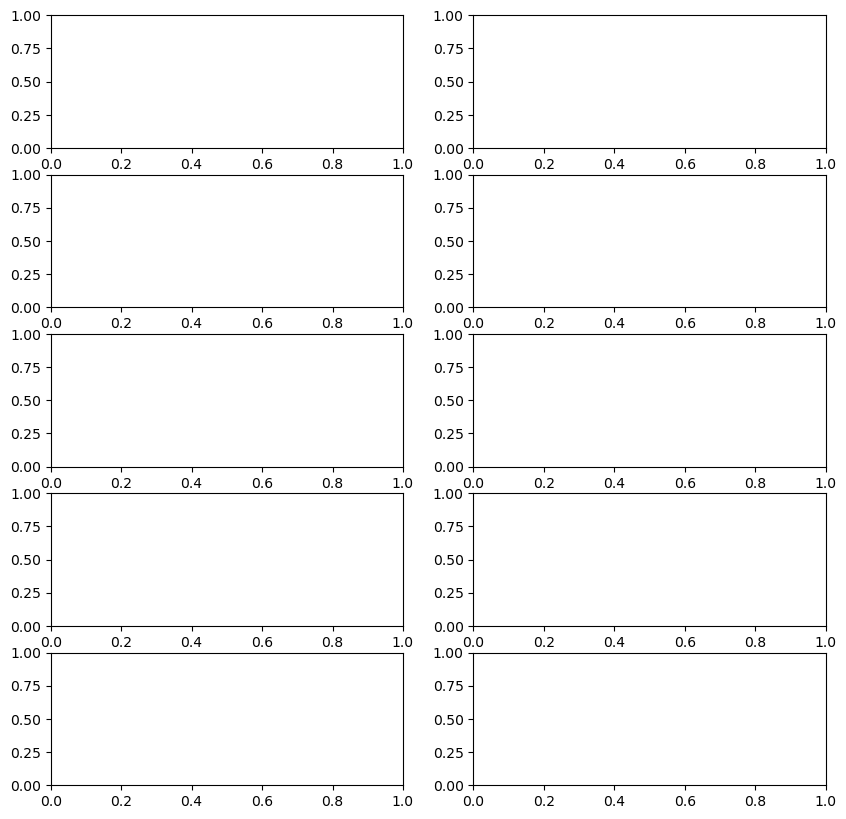

In [ ]:
import matplotlib.pyplot as plt

# Plot some random reconstructed samples and their true values
n_samples = 5
idx = np.random.choice(X_autoencoder_test.shape[0], size=n_samples, replace=False)

fig, axs = plt.subplots(n_samples, 2, figsize=(10, 10))

for i in range(n_samples):
    # Plot the true value
    axs[i, 0].plot(X_autoencoder_test[idx[i]].reshape(max_length, 4))
    axs[i, 0].set_title('True Value')

    # Plot the reconstructed value
    axs[i, 1].plot(test_predictions[idx[i]].reshape(max_length, 4))
    axs[i, 1].set_title('Reconstructed Value')

plt.tight_layout()
plt.show()
